# SVM
Support Vector Machine

<img src="https://steemitimages.com/640x0/http://mr-go.com/image/data/svm1.PNG" width="500" align="left">

In [1]:
import matplotlib.pyplot as plt
import numpy as np

<img src="https://miro.medium.com/max/1400/1*2g14OVjyJqio2zXwJxgj2w.png" width="700" align="left">

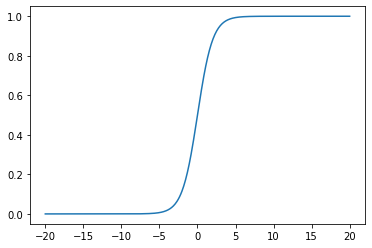

In [2]:
# sigmoid
x = np.linspace(-20, 20, 500)
g = 1 / (1 + np.exp(-x))

plt.plot(x, g)
plt.show()

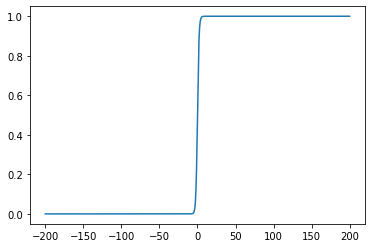

In [3]:
# sigmoid
x = np.linspace(-200, 200, 500)
g = 1 / (1 + np.exp(-x))

plt.plot(x, g)
plt.show()

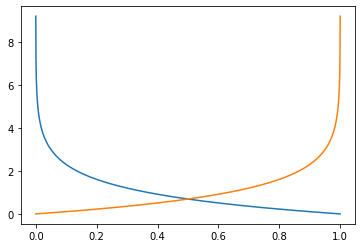

In [4]:
# cost function
d = 0.0001
g = np.linspace(d,1-d, 5000)
y_1 = -np.log(g)
y_2 = -np.log(1-g)

plt.plot(g, y_1)
plt.plot(g, y_2)
plt.show()

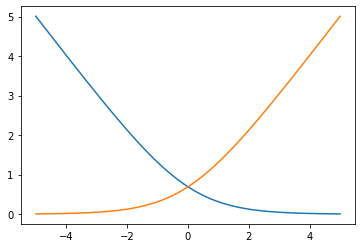

In [5]:
# sigmoid X cost function
x = np.linspace(-5, 5, 500)
g = 1 / (1 + np.exp(-x))
y_1 = -np.log(g)
y_2 = -np.log(1-g)

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.show()

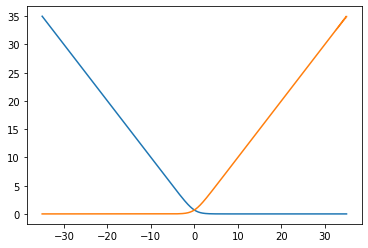

In [6]:
# sigmoid X cost function
x = np.linspace(-35, 35, 5000)
g = 1 / (1 + np.exp(-x))
y_1 = -np.log(g)
y_2 = -np.log(1.-g)

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.show()

<img src="https://miro.medium.com/max/1400/1*AndL5FYso8ad7LSrie8zoA.png" width="700" align="left">

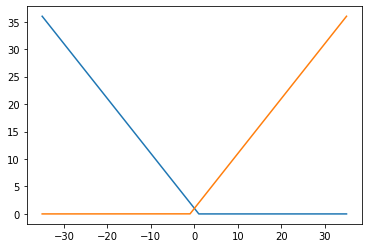

In [7]:
# SVM cost function
x = np.linspace(-35, 35, 5000)

zero_arr = np.full((len(x),), 0)
zero_1_x = list(zip(zero_arr, 1-x))
zero_x_1 = list(zip(zero_arr, 1+x))
y_1 = list(map(max, zero_1_x))
y_2 = list(map(max, zero_x_1))

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.show()

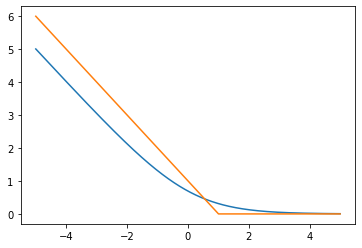

In [8]:
# sigmoid X cost function
x = np.linspace(-5, 5, 5000)
g = 1 / (1 + np.exp(-x))
y_1 = -np.log(g)

zero_arr = np.full((len(x),), 0)
zero_1_x = list(zip(zero_arr, 1-x))
y_2 = list(map(max, zero_1_x))

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.show()

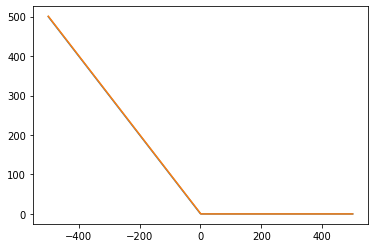

In [9]:
# sigmoid X cost function
x = np.linspace(-500, 500, 5000)
g = 1 / (1 + np.exp(-x))
y_1 = -np.log(g)

zero_arr = np.full((len(x),), 0)
zero_1_x = list(zip(zero_arr, 1-x))
y_2 = list(map(max, zero_1_x))

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.show()

# SVM

In [10]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

Populating the interactive namespace from numpy and matplotlib


In [11]:
# 데이터 가져오기
matfile = scipy.io.loadmat('ex6data1.mat')

X = matfile['X'] # m*n mat
y = matfile['y'] # m*1 mat

In [12]:
print(X.shape, y.shape)
print(X)
print(y)

(51, 2) (51, 1)
[[1.9643   4.5957  ]
 [2.2753   3.8589  ]
 [2.9781   4.5651  ]
 [2.932    3.5519  ]
 [3.5772   2.856   ]
 [4.015    3.1937  ]
 [3.3814   3.4291  ]
 [3.9113   4.1761  ]
 [2.7822   4.0431  ]
 [2.5518   4.6162  ]
 [3.3698   3.9101  ]
 [3.1048   3.0709  ]
 [1.9182   4.0534  ]
 [2.2638   4.3706  ]
 [2.6555   3.5008  ]
 [3.1855   4.2888  ]
 [3.6579   3.8692  ]
 [3.9113   3.4291  ]
 [3.6002   3.1221  ]
 [3.0357   3.3165  ]
 [1.5841   3.3575  ]
 [2.0103   3.2039  ]
 [1.9527   2.7843  ]
 [2.2753   2.7127  ]
 [2.3099   2.9584  ]
 [2.8283   2.6309  ]
 [3.0473   2.2931  ]
 [2.4827   2.0373  ]
 [2.5057   2.3853  ]
 [1.8721   2.0577  ]
 [2.0103   2.3546  ]
 [1.2269   2.3239  ]
 [1.8951   2.9174  ]
 [1.561    3.0709  ]
 [1.5495   2.6923  ]
 [1.6878   2.4057  ]
 [1.4919   2.0271  ]
 [0.962    2.682   ]
 [1.1693   2.9276  ]
 [0.8122   2.9992  ]
 [0.9735   3.3881  ]
 [1.25     3.1937  ]
 [1.3191   3.5109  ]
 [2.2292   2.201   ]
 [2.4482   2.6411  ]
 [2.7938   1.9656  ]
 [2.091    1.6177 

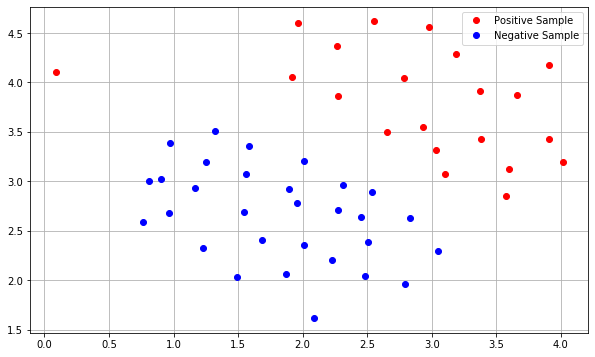

In [13]:
# 데이터 출력

pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:, 0],pos[:, 1],'ro',label='Positive Sample')
    plt.plot(neg[:, 0],neg[:, 1],'bo',label='Negative Sample')
    plt.legend()
    plt.grid(True)
    
plotData()

<img src="https://miro.medium.com/max/1400/1*AndL5FYso8ad7LSrie8zoA.png" width="500" align="left">

In [14]:
def costFunction(theta, X, y):
    # theta: (n+1)*1 mat
    # X: m*(n+1) mat
    # y: m*1 mat
    inner = np.dot(X, theta) # m*1 mat
    
    # inner의 0번째 열(axis=1)에 0을 insert 
    inner_1 = np.insert(1-inner, 0, 0, axis=1) # m*2 mat
    inner_0 = np.insert(1+inner, 0, 0, axis=1) # m*2 mat
   
    cost_1 = np.array(list(map(max, inner_1))).reshape([len(y), 1]) # m*1 mat
    cost_0 = np.array(list(map(max, inner_0))).reshape([len(y), 1]) # m*1 mat
    
    cost = y*cost_1 + (1-y)*cost_0
    
    return np.sum(cost)

ax + by + c = 0  
y = -a/b*x - c/b

In [15]:
def linearEquation(theta, x):
    # theta: (n+1)*1 mat
    bias = theta[0, 0]
    theta = theta[1:, :] # theta: n*1 mat
    y = -theta[0, 0]/theta[1, 0]*x - bias/theta[1, 0]
    
    return y

In [16]:
def plotBoundary(theta):
    plt.figure(figsize=(10,6))
    plt.plot(pos[:, 0],pos[:, 1],'ro',label='Positive Sample')
    plt.plot(neg[:, 0],neg[:, 1],'bo',label='Negative Sample')
    plt.legend()
    plt.grid(True)
    
    x = np.linspace(0, 4, 500)
    y = linearEquation(theta, x)
    plt.plot(x, y)
    plt.show()

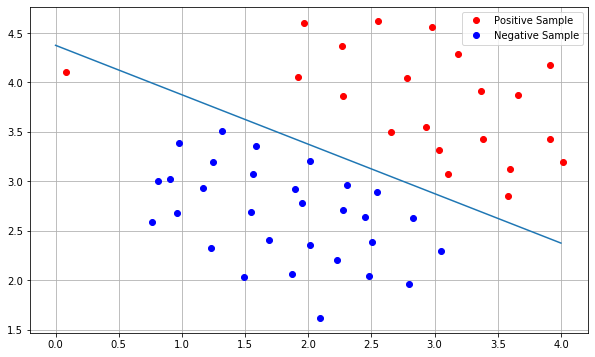

In [17]:
plotBoundary(np.array([[-70], [8], [16]]))

In [18]:
def gradientDescent(theta, X, y, alpha=0.001, epochs=3000):
    # theta: (n+1)*1 mat
    # X: m*(n+1) mat
    # y: m*1 mat
    tmptheta = theta
    costHist = []
    
    def dcost_dtheta(inner):
        # inner = [inner, bias, x1, x2, y]
        x = inner[1:4]
        y = inner[4] 
        if y==1:
            return -x if 1-inner[0]>0 else np.array([0, 0, 0])
        else:
            return x if 1+inner[0]>0 else np.array([0, 0, 0])
    
    for _ in range(epochs):
        inner = np.dot(X, theta) # m*1 mat

        inner = np.hstack([inner, X]) # m*4 mat
        inner = np.hstack([inner, y]) # m*5 mat
            
        costDiff = np.array(list(map(dcost_dtheta, inner))) # m*3 mat
        
        # 각 열을 모두 더하기 m*1 mat
        costDSum = np.array([[np.sum(costDiff[:, 0])], 
                             [np.sum(costDiff[:, 1])], 
                             [np.sum(costDiff[:, 2])]])
        
        # theta 갱신
        tmptheta = theta - alpha * costDSum
        theta = tmptheta
        
        # cost 기록
        costHist.append(costFunction(theta, X, y))        
    
    return theta, costHist
    

In [19]:
def running(start_theta=np.array([[1.],[1.],[1.]]), X=X, y=y, alpha=0.001, epochs=3000):
    theta = start_theta
    
    # 데이터 가져오기
    matfile = scipy.io.loadmat('ex6data1.mat')

    X = matfile['X'] # X: m*n mat
    y = matfile['y'] # y: m*1 mat

    # X의 0번째 열(axis=1)에 0을 insert 
    X = np.insert(X, 0, 1, axis=1) # X: m*(n+1) mat

    # 실행 전
    plotBoundary(theta)
    print('start theta:', theta[0], theta[1], theta[2])
    
    # 실행
    theta, costHist = gradientDescent(theta, X, y, alpha, epochs)

    # 실행 후
    plotBoundary(theta)
    print('result theta:', theta[0], theta[1], theta[2])

    # cost 변화 출력
    plt.figure(figsize=(10,6))
    plt.plot(range(len(costHist)), costHist, 'bo')

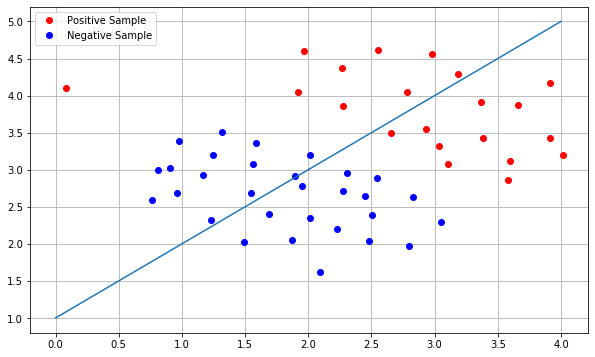

start theta: [-1.] [-1.] [1.]


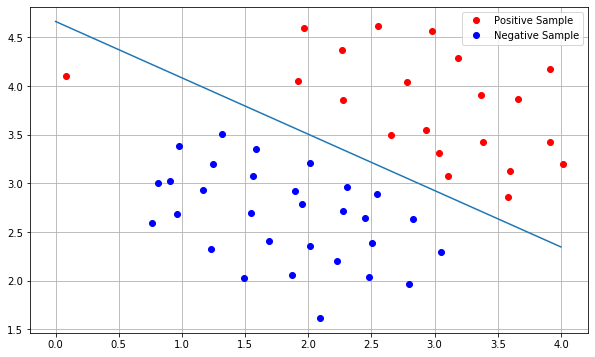

result theta: [-12.133] [1.50630065] [2.6023462]


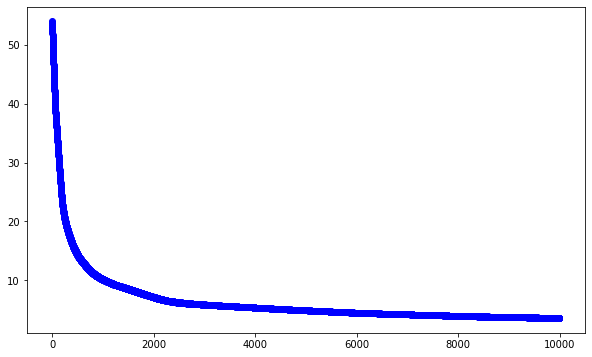

In [20]:
theta = np.array([[-1.],[-1.],[1.]])
alpha = 0.001
epochs = 10000
running(theta, X, y, alpha, epochs)